## Master Light Curve Plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

df = pd.read_csv('/Users/Djslime07/RecreatingStroh/25A-386 Project Data - Light Curve Data.csv')

classification_styles = {
    'Archival Ibc': {'color': '#04e3ff', 'marker': 'o'},
    'VLASS Ibc': {'color': '#04e3ff', 'marker': 's'},

    'Archival II': {'color': "#5cff04", 'marker': 'o'},
    'VLASS II': {'color': '#5cff04', 'marker': 's'},

    'Archival IIn': {'color': '#660099', 'marker': 'o'},
    'VLASS IIn': {'color': '#660099', 'marker': 's'},

    'new_VLASS': {'color': '#fb19dd', 'marker': 's'},
    '25A-386 Observations': {'color': '#fb19dd', 'marker': '*'},
    '25A-386 upper': {'color': '#fb19dd', 'marker': 'v'},
}

label_these = [
    'SN2024ehs', 'SN2019pqo', 'SN2021bmf',
    'PTF11qcj', 'SN2004c', 'SN2003bg', 'SN2004dk', 'SN2016coi',
    '1986J', 'SN2012au', '1998bw', 'SN2012ap', 'SN2020adhh', 'SN2009bb'
]

fig, ax = plt.subplots(figsize=(20, 12))
texts = []

for sn, group in df.groupby('SN'):
    group_sorted = group.sort_values(by='dt (years)')
    group_sorted = group_sorted[group_sorted['dt (years)'] >= 0]
    if group_sorted.empty:
        continue

    line_cls = str(group_sorted.iloc[0]['classification'])
    line_style = classification_styles.get(line_cls, {'color': 'gray', 'marker': 'o'})

    if sn in label_these:
        ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle='-', color='black', linewidth=4.0, alpha=0.5, zorder=0)

    ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
            linestyle='-', color=line_style['color'], linewidth=2.2, alpha=0.9, zorder=1)

    for _, row in group_sorted.iterrows():
        cls = str(row['classification'])
        status = row['status']
        style = classification_styles.get(cls, {'color': 'gray', 'marker': 'o'})
        marker = style['marker'] if status == 'real' else 'v'

        ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker=marker,
                   s=70, edgecolor='black', linewidth=1.2, zorder=2)

    if sn in label_these:
        final_row = group_sorted.iloc[-1]
        short_label = re.sub(r'^SN20(\d{2})', r'\1', sn)

        sn_type = final_row.get('type', '') 
        if pd.isna(sn_type):
            sn_type = ''
        else:
            sn_type = f"({sn_type})"

        label_text = f"{short_label}{sn_type}"

        x_offset = final_row['dt (years)'] * 1.04
        y_coord = final_row['Luminosity']
        if sn == 'SN2009bb':
            y_coord *= 0.9
        if sn =='1998bw':
            y_coord *= 0.8; x_offset = final_row['dt (years)'] 
        if sn =='SN2012au':
            y_coord *= 1

        text = ax.text(x_offset, y_coord, label_text,
                   fontsize=14, color=line_style['color'],
                   ha='left', va='center')
        texts.append(text)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Archival Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),

    #Line2D([0], [0], marker='o', color='w', label='Archival Type II Observations',
           #markerfacecolor='#5cff04', markersize=10, markeredgecolor='black'),
    #Line2D([0], [0], marker='s', color='w', label='VLASS Type II Observations',
           #markerfacecolor='#5cff04', markersize=10, markeredgecolor='black'),    
              
    Line2D([0], [0], marker='o', color='w', label='Archival Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='s', color='w', label='VLASS Observations (Targets)',
           markerfacecolor='#fb19dd', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='*', color='w', label='VLASS 25A-386 Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black')
]

ax.legend(handles=legend_elements, loc='lower left', fontsize=15, frameon=True, framealpha=0.95)
ax.set_xscale('log')
ax.set_yscale('log')
xmax = df['dt (years)'].max()
ax.set_xlim(right=xmax * 2)
ax.set_title("Radio Luminosity Evolution of Core-Collapse Supernovae", fontsize=22, pad=20)
ax.set_xlabel('Time Since Explosion (years)', fontsize=20, labelpad=12)
ax.set_ylabel('Luminosity (erg/s/Hz)', fontsize=20, labelpad=12)
plt.tick_params(axis='both', which='major', labelsize=18)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)
legend = ax.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=15,
    frameon=True,
    framealpha=0.95,
    ncol=2,                     
    handletextpad=0.5    
)
legend.get_frame().set_linewidth(2.5)
legend.get_frame().set_edgecolor('black')
plt.tight_layout()
plt.show()

## Redshift to Luminosity

In [ ]:
import pandas as pd
import numpy as np
from astropy.cosmology import Planck18 as cosmo

df = pd.read_csv('/Users/Djslime07/RecreatingStroh/temp2.csv')  

flux_cgs = df['Flux'] * 1e-26 

d_L = cosmo.luminosity_distance(df['Redshift']).cgs.value 

L_nu = 4 * np.pi * d_L**2 * flux_cgs
print(L_nu)

df['luminosity (erg/s/Hz)'] = L_nu
print(L_nu)
df.to_csv('temp2.csv', index=False)


## Distance (Mpc) to Luminosity

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/Djslime07/RecreatingStroh/archival_SNe/luminosity_output_multiple.csv')  
d_L_cm = df['Distance (Mpc)'] * 3.0856775814913673e24

flux_cgs = df['Flux'] * 1e-26
flux_cgs = flux_cgs.abs()  

L_nu = 4 * np.pi * d_L_cm**2 * flux_cgs
print(L_nu)

df['L_nu'] = L_nu
print(L_nu)
#df.to_csv('/Users/Djslime07/RecreatingStroh/archival_SNe/luminosity_output_multiple.csv', index=False)

## Shaded Regions

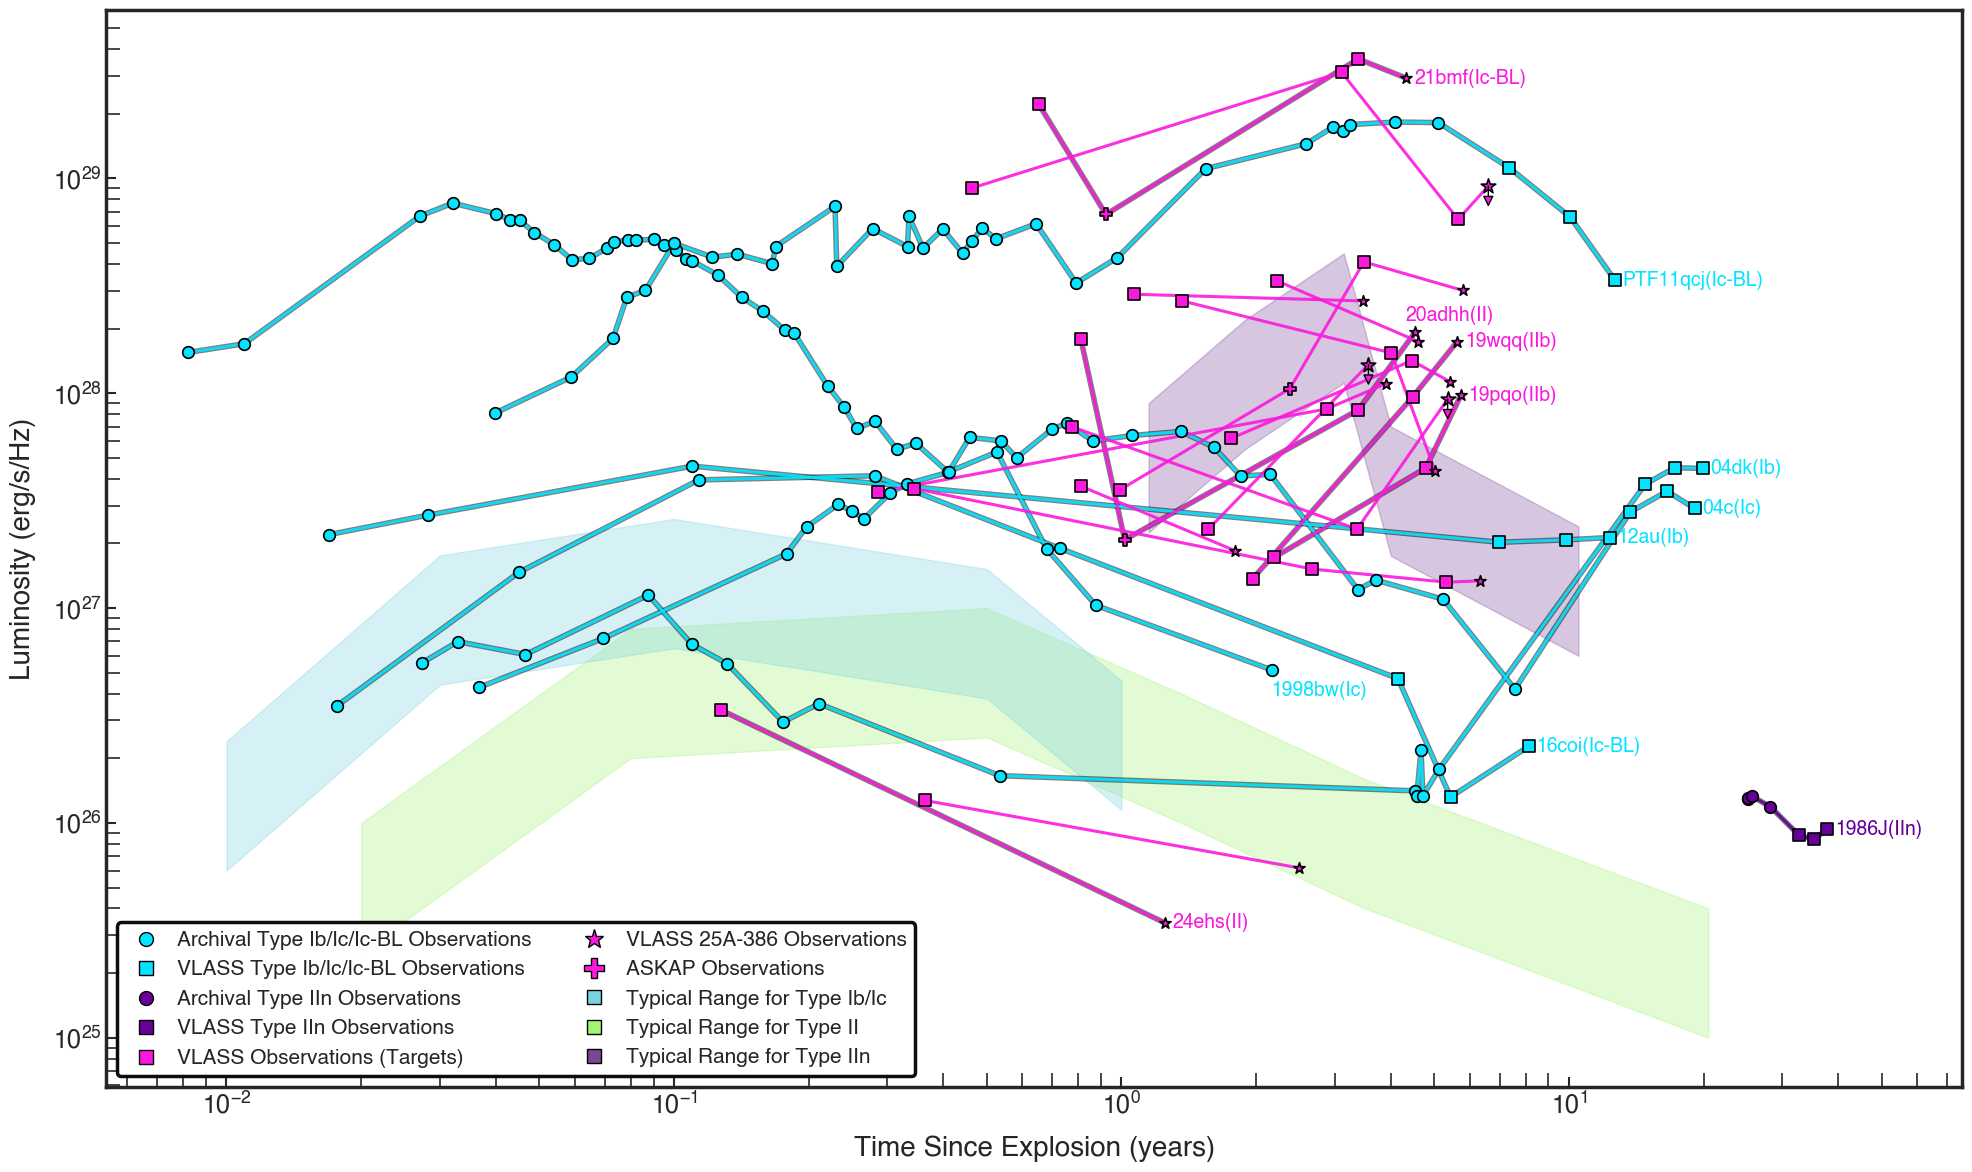

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

df = pd.read_csv('/Users/Djslime07/RecreatingStroh/25A-386 Project Data - Light Curve Data.csv')

classification_styles = {
    'Archival Ibc': {'color': '#04e3ff', 'marker': 'o'},
    'VLASS Ibc': {'color': '#04e3ff', 'marker': 's'},

    'Archival II': {'color': "#5cff04", 'marker': 'o'},
    'VLASS II': {'color': '#5cff04', 'marker': 's'},

    'Archival IIn': {'color': '#660099', 'marker': 'o'},
    'VLASS IIn': {'color': '#660099', 'marker': 's'},

    'new_VLASS': {'color': '#fb19dd', 'marker': 's'},
    '25A-386 Observations': {'color': '#fb19dd', 'marker': '*'},
    '25A-386 upper': {'color': '#fb19dd', 'marker': 'v'},
    'ASKAP Observations': {'color': '#fb19dd', 'marker': 'P'},

    'Ib/c average': {'color': "#7ad3df", 'marker': 's'},
    'II average': {'color': "#a0f571", 'marker': 's'},
    'IIn average': {'color': "#7B4596", 'marker': 's'},

    
}

label_these = [
    'SN2024ehs', 'SN2019pqo', 'SN2021bmf', 'SN2019wqq',
    'PTF11qcj', 'SN2004c', 'SN2003bg', 'SN2004dk', 'SN2016coi',
    '1986J', 'SN2012au', '1998bw', 'SN2012ap', 'SN2020adhh', 'SN2009bb'
]

fig, ax = plt.subplots(figsize=(20, 12))
texts = []

for sn, group in df.groupby('SN'):
    group_sorted = group.sort_values(by='dt (years)')
    group_sorted = group_sorted[group_sorted['dt (years)'] >= 0]
    if group_sorted.empty:
        continue

    line_cls = str(group_sorted.iloc[0]['classification'])
    line_style = classification_styles.get(line_cls, {'color': 'gray', 'marker': 'o'})

    if line_cls in ["IIn average", "Ib/c average", "II average"]:
        group_sorted['Luminosity_upper'] = group_sorted['Luminosity'] * 2
        group_sorted['Luminosity_lower'] = group_sorted['Luminosity'] * 0.5

        ax.fill_between(group_sorted['dt (years)'],
                        group_sorted['Luminosity_lower'],
                        group_sorted['Luminosity_upper'],
                        color=line_style['color'],
                        alpha=0.3,
                        zorder=0)
    else:
        if sn in label_these:
            ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                    linestyle='-', color='black', linewidth=4.0, alpha=0.5, zorder=0)

        ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle='-', color=line_style['color'], linewidth=2.2, alpha=0.9, zorder=1)

    if line_cls not in ["IIn average", "Ib/c average", "II average"]:
        for _, row in group_sorted.iterrows():
            cls = str(row['classification'])
            status = row['status']
            style = classification_styles.get(cls, {'color': 'gray', 'marker': 'o'})
            if status == 'real':
                marker = style['marker']
                ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker=marker,
                   s=70, edgecolor='black', linewidth=1.2, zorder=2)
            elif status == 'upper':
                ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker='*',
                   s=120, edgecolor='black', linewidth=1.2, zorder=2)
                ax.annotate(
                    '', 
                    xy=(row['dt (years)'], row['Luminosity'] * 0.8), 
                    xytext=(row['dt (years)'], row['Luminosity']),   
                    arrowprops=dict(facecolor='#fb19dd', edgecolor='black', arrowstyle='-|>', lw=1, shrinkA=0, shrinkB=0),
                    annotation_clip=False
        )

    if sn in label_these and line_cls != "IIn average":
        final_row = group_sorted.iloc[-1]
        short_label = re.sub(r'^SN20(\d{2})', r'\1', sn)

        sn_type = final_row.get('type', '') 
        if pd.isna(sn_type):
            sn_type = ''
        else:
            sn_type = f"({sn_type})"

        label_text = f"{short_label}{sn_type}"

        x_offset = final_row['dt (years)'] * 1.04
        y_coord = final_row['Luminosity']
        if sn == 'SN2009bb':
            y_coord *= 0.9
        if sn == '1998bw':
            y_coord *= 0.8; x_offset = final_row['dt (years)'] 
        if sn == 'SN2012au':
            y_coord *= 1
        if sn =='SN2020adhh':
            y_coord *= 1.2;  x_offset = final_row['dt (years)'] * 0.95

        text = ax.text(x_offset, y_coord, label_text,
                   fontsize=14, color=line_style['color'],
                   ha='left', va='center')
        texts.append(text)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Archival Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),   
              
    Line2D([0], [0], marker='o', color='w', label='Archival Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='s', color='w', label='VLASS Observations (Targets)',
           markerfacecolor='#fb19dd', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='*', color='w', label='VLASS 25A-386 Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'), 
    Line2D([0], [0], marker='P', color='w', label='ASKAP Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'), 

    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type Ib/Ic',
           markerfacecolor='#7ad3df', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type II',
           markerfacecolor='#a0f571', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type IIn',
           markerfacecolor='#7B4596', markersize=10, markeredgecolor='black'),
]

ax.legend(
    handles=legend_elements,
    loc='lower left',
    fontsize=15,
    frameon=True,
    framealpha=0.95,
    ncol=2,
    handletextpad=0.5
)
ax.set_xscale('log')
ax.set_yscale('log')
xmax = df['dt (years)'].max()
ax.set_xlim(right=xmax * 2)
ax.set_xlabel('Time Since Explosion (years)', fontsize=20, labelpad=12)
ax.set_ylabel('Luminosity (erg/s/Hz)', fontsize=20, labelpad=12)
plt.tick_params(axis='both', which='major', labelsize=18)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.5)
legend.get_frame().set_edgecolor('black')

ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))

ax.tick_params(axis='both', which='minor', length=10, width=1.2)
plt.tight_layout()
plt.savefig('luminosity_plot.pdf', format='pdf', bbox_inches='tight')

## LaTeX Table

In [ ]:
import pandas as pd
from collections import defaultdict

df = pd.read_csv('LaTeX_Table.csv')

supernovae = defaultdict(lambda: {
    "Type": "",
    "Redshift": "",
    "RA": "",
    "Dec": "",
    "VLASS": ["---", "---", "---"],
    "25A-386": {"S": "---", "C": "---", "X": "---"},
    "25A-MJD": None
})

for _, row in df.iterrows():
    name = row["Name"]
    epoch = row["Epoch"]
    flux = row["Flux Density (mJy)"]
    mjd = row["MJD"]

    sn = supernovae[name]
    sn["Type"] = row["Type"]
    sn["Redshift"] = row["Redshift"]
    sn["RA"] = row["Right Ascension"]
    sn["Dec"] = row["Declination"]

    if "VLASS Epoch" in epoch:
        idx = int(epoch.split()[-1]) - 1
        sn["VLASS"][idx] = f"{flux} ({int(mjd)})"
    elif "25A-386" in epoch:
        band = epoch.split()[-2]
        sn["25A-386"][band[0]] = f"{flux}"
        sn["25A-MJD"] = f"{float(mjd):.2f}"[:8]

latex_lines = []

latex_lines.append("\\begin{table*}")
latex_lines.append("\\centering")
latex_lines.append("\\caption{Radio Flux Densities and MJDs of 17 Target Supernovae}")
latex_lines.append("\\begin{tabular}{llccccccc}")
latex_lines.append("\\hline")
latex_lines.append("Name & Type & $z$ & RA & Dec &")
latex_lines.append("VLASS & VLASS & VLASS & 25A-386 S / C / X \\\\")
latex_lines.append("& & & (hh:mm:ss.ss) & (dd:mm:ss.ss) &")
latex_lines.append("Epoch 1 & Epoch 2 & Epoch 3 & 25A-386 S / C / X \\\\")
latex_lines.append("\\hline")

for name, info in supernovae.items():
    s, c, x = info["25A-386"]["S"], info["25A-386"]["C"], info["25A-386"]["X"]
    scx = f"{s} / {c} / {x} ({info['25A-MJD']})" if info["25A-MJD"] else "---"
    row = f"{name} & {info['Type']} & {info['Redshift']} & {info['RA']} & {info['Dec']} & " \
          f"{info['VLASS'][0]} & {info['VLASS'][1]} & {info['VLASS'][2]} & {scx} \\\\"
    latex_lines.append(row)

latex_lines.append("\\hline")
latex_lines.append("\\end{tabular}")
latex_lines.append("\\label{tab:radio_flux}")
latex_lines.append("\\end{table*}")

with open("radio_flux_table.tex", "w") as f:
    f.write("\n".join(latex_lines))

print("LaTeX table written to 'radio_flux_table.tex'")

LaTeX table written to 'radio_flux_table.tex'


## Histogram for SNe Types

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',  
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})


df = pd.read_csv('bts_data.CSV')

types = df['type'].unique()
parent_types = sorted([
    'TDE', 'SN Ia', 'SN Ic', 'SN II', 'SN Ib', 'SN IIn',
    'SN IIP', 'SN Ic-BL'
], key=len, reverse=True)

def map_type(t):
    for parent in parent_types:
        if t.startswith(parent):
            return parent
    return 'Other'

H_Rich = ["SN II", "SN IIn", "SN IIP"]
H_Poor = ["SN Ia", "SN Ib", "SN IIb", "SN Ic", "SN Ic-BL"]
Other_H = ["TDE"]

df['mapped_type'] = df['type'].apply(map_type)

type_counts = df['mapped_type'].value_counts().sort_values(ascending=False)

def get_color(sn_type):
    if sn_type in H_Rich:
        return '#332288'
    elif sn_type in H_Poor:
        return '#88CCEE'
    elif sn_type in Other_H:
        return '#44AA99'
    else:
        return 'gray'

colors = [get_color(t) for t in type_counts.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts.index, type_counts.values, color=colors, width=0.7)
plt.xticks(rotation=30, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(int(height)),
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Supernova Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#332288', label='H-rich'),
    Patch(facecolor='#88CCEE', label='H-poor'),
    Patch(facecolor='#44AA99', label='Other'),
    Patch(facecolor='gray', label='Unclassified'),
]
plt.legend(handles=legend_elements, title="Stellar Progenitor")
plt.savefig('sn_type_distribution.pdf', format='pdf', bbox_inches='tight')

## ASKAP Cutouts

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

file_path = "/Users/Djslime07/Downloads/cutout-980952-imagecube-453239.fits"
name = 'SN2024ehs'

with fits.open(file_path) as hdul:
    data = hdul[0].data
    header = hdul[0].header
    image = data[0, 0, :, :]  
    print(header)

    std_temp = np.ma.std(image)
    keep = np.ma.abs(image) <= 3 * std_temp
    rms = np.ma.std(image[keep])
    peak_flux = np.ma.max(image)

    if 'MJD-OBS' in header:
        mjd = float(header['MJD-OBS'])
    elif 'DATE' in header:
        mjd = Time(header['DATE']).mjd
    else:
        mjd = None

    
    freq = header['RESTFREQ'] / 1e9
    
    print(f"RMS: {rms:.5e} Jy")
    print(f"Peak Flux: {peak_flux:.5e} Jy")
    print(f"MJD:{mjd}")
    print(f"Frequency: {freq} GHz")

    peak_str = f"Peak Flux: {peak_flux*1e3:.3f} mJy"
    rms_str = f"RMS Flux: {rms*1e3:.3f} mJy"
    plt.imshow(image, cmap = 'YlOrRd')
    plt.title(f"{name} | {mjd} | {freq} GHz \n {peak_str} | {rms_str}")
    plt.xlabel("RA Offset (arcsec)")
    plt.ylabel("Dec Offset (arcsec)")
    plt.savefig(f'/Users/Djslime07/RecreatingStroh/askap_cutouts/{name}_{freq}.png')
    plt.show()
    output_file = 'ask.csv'

    with open(output_file, 'a') as f:
        print(f"{name}, {mjd}, {freq}, {peak_flux*1e3:.3f}, {rms*1e3:.3f}", file=f)
